# OCR with Tessearact

#### see Tutorial: https://nanonets.com/blog/ocr-with-tesseract/

## Libraries

In [1]:
import os
from os import listdir
import os.path

import cv2 #for preprocessing
import numpy as np #for handling data
import re

import matplotlib.pyplot as plt #for showing the images in the notebook
import matplotlib.image as mpimg #for reading images from their path

import pytesseract #for the OCR
pytesseract.pytesseract.tesseract_cmd = r'C:/Program Files/Tesseract-OCR/tesseract.exe'

import enchant #for checking words in dictionary
d = enchant.Dict("en_US")
from nltk.tokenize import word_tokenize

import csv # for saving the texts in a csv
import pandas as pd # for creating data frames that can be saved in csv

## Preprocessing

In [3]:
# define image path
#img_path = 'D:\master_leipzig\Leipzig_S3\Information Retrieval\irlab\images\I5e\I5eef4f27eec7850b/image.png' # philosophy
img_path = "D:\master_leipzig\Leipzig_S3\Information Retrieval\irlab\images\I1d\I1d2daca3b175d17f/image.png" # story writing
#img_path = 'D:\master_leipzig\Leipzig_S3\Information Retrieval\irlab\images\I3c\I3c0db0a0603784fc/image.png' # prostitution
#img_path = 'D:\master_leipzig\Leipzig_S3\Information Retrieval\irlab\images\I3c\I3ca154c82b8561ec/image.png'

# read the image from path
img = cv2.imread(img_path)

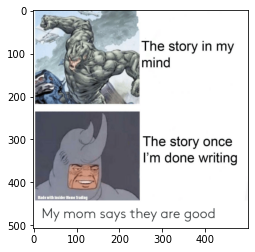

In [4]:
# display the image (necessary to convert colors from BGR to RGB for matplotlib)
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imgplot = plt.imshow(RGB_img)

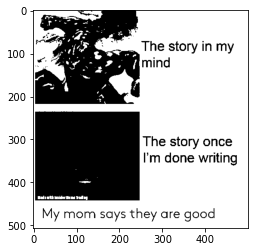

In [5]:
# convert image to grayscale and binarize it
pp_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
pp_img = cv2.threshold(pp_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# display the image
imgplot = plt.imshow(pp_img)
plt.gray()

## OCR

In [6]:
# Adding custom options
custom_config = r'--oem 3 --psm 6'
text = pytesseract.image_to_string(pp_img, config=custom_config)

print(text)

= ae
pe
pra ;
Pia ee The story in my
<a emg mind
an | na f
The story once
I'm done writing
My mom says they are good



In [7]:
# preprocess the text

text = text.lower()
text = re.sub('[^a-z]+', ' ', text)
tokens = word_tokenize(text)
clean_text = ''

# only keep words that are in english dictionary and longer than 2 characters

for word in tokens:
    if len(word) <= 2:
        continue
    if d.check(word):
        clean_text += " " + word

print(clean_text)

 the story mind the story once done writing mom says they are good


## for all images

In [8]:
# OCR function

def ocr(path):
    img = cv2.imread(path)
    if img is None:
        print("Image can not be read, path: ", path, "\n") # I37377d0aa6480791 and I96a19b1859d5898b are not readable
        return ""
    pp_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    pp_img = cv2.threshold(pp_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    custom_config = r'--oem 3 --psm 6'
    text = pytesseract.image_to_string(pp_img, config=custom_config)
    # preprocess the text
    text = text.lower()
    text = re.sub('[^a-z]+', ' ', text)
    tokens = word_tokenize(text)
    clean_text = ''
    for word in tokens:
        if len(word) <= 2:
            continue
        if d.check(word):
            clean_text += " " + word
    return clean_text

In [9]:
# save image text in tsv file for all images

cwd = os.getcwd() + "/images_new/"
all_texts = []
page_ids = []

image_files = [f for f in listdir(cwd)]

for f in image_files:
    subdir = cwd + f
    subdir_files = [f for f in listdir(subdir)]
    print(f)

    for f2 in subdir_files:
        img_path = subdir + "/" + f2 + '/image.png'
        page_ids.append(f2)

        if os.path.isfile(img_path) == False:
            print("Image at ", f2, " does not exist \n")
            all_texts.append("empty")
        else:
            text = ocr(img_path)
            all_texts.append(text)

# make final dataframe
df = pd.DataFrame({'Page ID': page_ids, 'Image Text' : all_texts})
df.to_csv('imge_texts_from_OCR_new .tsv', index = False, sep='\t', line_terminator = '\r\n')

I00
I01
I02
I03
I04
I05
I06
I07
I08
I09
I0a
I0b
I0c
I0d
I0e
I0f
I10
I11
I12
I13
I14
I15
I16
I17
I18
I19
I1a
I1b
I1c
I1d
I1e
I1f
I20
I21
I22
I23
I24
I25
I26
I27
I28
I29
I2a
I2b
I2c
I2d
I2e
I2f
I30
I31
I32
I33
I34
I35
I36
I37
Image can not be read, path:  d:\master_leipzig\Leipzig_S3\Information Retrieval\irlab/images_new/I37/I37377d0aa6480791/image.png 

I38
I39
I3a
I3b
I3c
I3d
I3e
I3f
I40
I41
I42
I43
I44
I45
I46
I47
I48
I49
I4a
I4b
I4c
I4d
I4e
I4f
I50
I51
I52
I53
I54
I55
I56
I57
I58
I59
I5a
I5b
I5c
I5d
I5e
I5f
I60
I61
I62
I63
I64
I65
I66
I67
I68
I69
I6a
I6b
I6c
I6d
I6e
I6f
I70
I71
I72
I73
I74
I75
I76
I77
I78
I79
I7a
I7b
I7c
I7d
I7e
I7f
I80
I81
I82
I83
I84
I85
I86
I87
I88
I89
I8a
I8b
I8c
I8d
I8e
I8f
I90
I91
I92
I93
I94
I95
I96
Image can not be read, path:  d:\master_leipzig\Leipzig_S3\Information Retrieval\irlab/images_new/I96/I96a19b1859d5898b/image.png 

I97
I98
I99
I9a
I9b
I9c
I9d
I9e
I9f
Ia0
Ia1
Ia2
Ia3
Ia4
Ia5
Ia6
Ia7
Ia8
Ia9
Iaa
Iab
Iac
Iad
Iae
Iaf
Ib0
Ib1
Ib2
Ib3
Ib4
Ib5
Ib6
Ib7


In [17]:
print(f2)

I002d0f682f42a16d
